# REGRESSION TESTS

### Initial setup:

In [53]:
## importing Libraries
%run code/import_libs.py

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Importing Functions
%run code/functions_v1.4.py

## Importing Widgets Forms
%run code/Build_Forms_v1.4.py

## Loading and Initial preparation of the data (fillnulls, new features, filtering)
%run code/initial_data_prep.py

%matplotlib inline


# SPLITTING DATA IN PREDICTORS(X) and price (Y)

initial_pred = df.drop(columns=["price"]).copy()
initial_price = df[["price"]]

#FILTER
df=df[~df["grade"].isin([3,4,5])]
df.shape


(20880, 28)

* Prepared Data for Modeling using custom "transform_data" function <br> (see functions_v1.4.py) 
* Created/trained model using statsmodels.OLS
* Made sure r-square is good 

In [54]:
# Create OLS linear model
x, y = transform_data(initial_pred, initial_price)

pred=x
price=y
pred_int = sm.add_constant(pred)
model = sm.OLS(price,pred_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1765.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:28:58   Log-Likelihood:                 5922.4
No. Observations:               21143   AIC:                        -1.167e+04
Df Residuals:                   21055   BIC:                        -1.097e+04
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.7842      0.035    221.453      0.000       7.715       7.853
sqft_living       0.4536      0.005     86.598      0.000       0.443       0.464
sqft_lot          0.0772      0.002     35.980      0.000       0.073       0.081
dec_1920-1939     0.0060      0.007      0.888      0.374      -0.007       0.019
dec_1940-1949    -0.0468      0.007     -6.616      0.000      -0.061      -0.033
dec_1950-1959    -0.0949      0.007    -13.979      0.000      -0.108      -0.082
dec_1960-1969    -0.1190      0.007    -17.156      0.000      -0.133      -0.105
dec_1970-1979    -0.1286      0.007    -17.750      0.000      -0.143      -0.114
dec_1980-1989    -0.1083      0.007    -14.914      0.000      -0.123      -0.094
dec_1990-1999    -0.0999      0.007    -13.489      0.000      -0.114      -0.085
dec_2000-2009    -0.0653      0.007     -9.324      0.000      -0.079      -0.052
dec_2010-2029     0.0051      0.008      0.617      0.537      -0.011       0.021
zip_98002         0.0063      0.016      0.385      0.700      -0.026       0.038
zip_98003         0.0396      0.015      2.671      0.008       0.011       0.069
zip_98004         1.1674      0.014     80.517      0.000       1.139       1.196
zip_98005         0.7872      0.017     45.187      0.000       0.753       0.821
zip_98006         0.6969      0.013     53.414      0.000       0.671       0.722
zip_98007         0.6985      0.018     37.770      0.000       0.662       0.735
zip_98008         0.6974      0.015     46.864      0.000       0.668       0.727
zip_98010         0.2415      0.021     11.486      0.000       0.200       0.283
zip_98011         0.4730      0.016     28.706      0.000       0.441       0.505
zip_98014         0.2834      0.019     14.580      0.000       0.245       0.321
zip_98019         0.3132      0.017     18.844      0.000       0.281       0.346
zip_98022         0.0468      0.016      2.977      0.003       0.016       0.078
zip_98023     -1.356e-05      0.013     -0.001      0.999      -0.025       0.025
zip_98024         0.3994      0.023     17.366      0.000       0.354       0.444
zip_98027         0.5348      0.013     39.725      0.000       0.508       0.561
zip_98028         0.4290      0.015     29.060      0.000       0.400       0.458
zip_98029         0.6278      0.014     43.451      0.000       0.599       0.656
zip_98030         0.0579      0.015      3.815      0.000       0.028       0.088
zip_98031         0.1074      0.015      7.186      0.000       0.078       0.137
zip_98032        -0.0005      0.019     -0.027      0.978      -0.038       0.037
zip_98033         0.8185      0.013     61.611      0.000       0.792       0.845
zip_98034         0.5802      0.013     45.814      0.000       0.555       0.605
zip_98038         0.1773      0.012     14.217   


* For 100 times: Randomly split not-transformed data in test and train sets  

* Prepared Data for Modeling using custom "transofrm_data" function   (see functions_v1.4.py)  


 

In [55]:
abs_test_results=[]
test_results=[]
test_rmse_results=[]
rsquared_list=[]

for i in range(50):
    
    x0_train, x0_test, y0_train, y0_test = train_test_split(initial_pred, initial_price, test_size=0.3)

#Transformed both test and train data
    x1_train, y1_train = transform_data(x0_train, y0_train)
    x1_test, y1_test = transform_data (x0_test, y0_test)

# Fit training data and created a model
    linreg = LinearRegression()
    linreg.fit(x1_train, y1_train)
    
# Used trained model to predict test values

    y1_test_pred = linreg.predict(x1_test)
    
    y1_test_pred=np.exp(y1_test_pred)

# Calculated mean and absolute mean of differences and RMSE:
    miss = np.mean((y1_test_pred-y0_test)/y0_test)[0]
    miss_abs = np.mean(np.abs((y1_test_pred-y0_test)/y0_test))[0]
    test_mse = mean_squared_error(y0_test, y1_test_pred)
    
      
# Appended data to the corresponding list.     
    test_results.append(miss)
    abs_test_results.append(miss_abs)
    test_rmse_results.append(np.sqrt(test_mse))
    rsquared_list.append(linreg.score(x1_test, y1_test))
    
# CALCULATING THE AVERAGES
avg_miss = sum(test_results)/len(test_results)*100
avg_miss_abs = sum(abs_test_results)/len(abs_test_results)*100
avg_rmse = sum(test_rmse_results)/len(test_rmse_results)
avg_rsquared = np.mean(rsquared_list) 

print ( "Mean differences:" ,  str(round(avg_miss,3))+'%', "Abs. Mean Differences:",  \
       str(round(avg_miss_abs,3))+'%', "RMSE in dollars: ", round(avg_rmse,2))
print ("Average Rsquared:", avg_rsquared)


Mean differences: 1.772% Abs. Mean Differences: 13.796% RMSE in dollars:  128628.03
Average Rsquared: 0.8778487569053547


## Testing additional interactions of the futures: 
    



In [56]:

x1, y1 = transform_data(initial_pred, initial_price)



x1['interact3']=x1['grade']*initial_pred['condition']
x1['interact5']=x1['sqft_living']*x1['grade']
x1['interact6']= x1['sqft_living']*x1['sqft_lot']

## By introducing interactions r2square has 0.5% of increase

In [57]:
pred=x1
price=y1
pred_int = sm.add_constant(pred)
model = sm.OLS(price,pred_int).fit()

coef_df=model.params.reset_index()
coef_df.columns=["Column","Value"]

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1791.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:29:04   Log-Likelihood:                 6375.3
No. Observations:               21143   AIC:                        -1.257e+04
Df Residuals:                   21052   BIC:                        -1.184e+04
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.6602      0.240     27.705      0.000       6.189       7.131
sqft_living       0.5971      0.031     19.403      0.000       0.537       0.657
sqft_lot          0.4309      0.026     16.458      0.000       0.380       0.482
dec_1920-1939     0.0081      0.007      1.214      0.225      -0.005       0.021
dec_1940-1949    -0.0411      0.007     -5.927      0.000      -0.055      -0.027
dec_1950-1959    -0.0756      0.007    -11.250      0.000      -0.089      -0.062
dec_1960-1969    -0.0938      0.007    -13.574      0.000      -0.107      -0.080
dec_1970-1979    -0.0954      0.007    -13.166      0.000      -0.110      -0.081
dec_1980-1989    -0.0616      0.007     -8.429      0.000      -0.076      -0.047
dec_1990-1999    -0.0398      0.008     -5.298      0.000      -0.055      -0.025
dec_2000-2009     0.0020      0.007      0.277      0.782      -0.012       0.016
dec_2010-2029     0.0693      0.008      8.215      0.000       0.053       0.086
zip_98002        -0.0074      0.016     -0.464      0.643      -0.039       0.024
zip_98003         0.0440      0.015      3.033      0.002       0.016       0.072
zip_98004         1.1616      0.014     81.703      0.000       1.134       1.189
zip_98005         0.7861      0.017     46.033      0.000       0.753       0.820
zip_98006         0.6778      0.013     52.942      0.000       0.653       0.703
zip_98007         0.6970      0.018     38.491      0.000       0.662       0.733
zip_98008         0.7002      0.015     48.043      0.000       0.672       0.729
zip_98010         0.2328      0.021     11.304      0.000       0.192       0.273
zip_98011         0.4813      0.016     29.836      0.000       0.450       0.513
zip_98014         0.2860      0.019     15.026      0.000       0.249       0.323
zip_98019         0.3172      0.016     19.493      0.000       0.285       0.349
zip_98022         0.0297      0.015      1.928      0.054      -0.000       0.060
zip_98023         0.0001      0.013      0.010      0.992      -0.025       0.025
zip_98024         0.4142      0.023     18.383      0.000       0.370       0.458
zip_98027         0.5351      0.013     40.536      0.000       0.509       0.561
zip_98028         0.4392      0.014     30.387      0.000       0.411       0.468
zip_98029         0.6325      0.014     44.712      0.000       0.605       0.660
zip_98030         0.0583      0.015      3.924      0.000       0.029       0.087
zip_98031         0.0996      0.015      6.809      0.000       0.071       0.128
zip_98032        -0.0040      0.019     -0.212      0.832      -0.041       0.033
zip_98033         0.8101      0.013     62.267      0.000       0.785       0.836
zip_98034         0.5860      0.012     47.249      0.000       0.562       0.610
zip_98038         0.1756      0.012     14.384   

# Testing custom function to get coefficients from <br>OLS and calculate the formula of the slopes

* used custom function "calcuate_price" and "get_coeff" to get coefficients from ols model (see functions_v1.4.py

In [58]:


# Create OLS linear model
pred_fin, price_fin = transform_data(initial_pred, initial_price)

pred_int = sm.add_constant(pred_fin)
model = sm.OLS(price_fin,pred_int).fit()

coef_df=model.params.reset_index()
coef_df.columns=["Column","Value"]

\

#############################################################################
def calculate_price (sqft_living, decade, basement, zipcode, grade, waterfront, view , sqft_lot,  
                     mean_price, coef_df=coef_df, output='yes'):
 
    if waterfront == 'NO' or not waterfront: 
        waterfront = 0
    else: 
        waterfront = 1
            
    b0,b1,b2,b3,b4,b5,b6,b7,b8 = get_coeff( decade, zipcode, grade, waterfront, view, coef_df)
    y=round( np.exp(b0 + b1*np.log(sqft_living) + b2*np.log(sqft_lot) + b3*basement + b4*waterfront + b5*grade + b6 + b7 + b8) )
    
    if output == 'yes': y=y*(mean_price/mean_price_2014_2015)
    # print('{:,.0f}'.format(y))
    return y,b0,b1,b2,b3,b4,b5,b6,b7,b8
####################################################################################


## 500 ITERATIONS to test precision of "calculate_price" function

In [59]:
mean_price_2014_2015=initial_price.mean()[0]

abs_test_results=[]
test_results=[]
for i in range(1000):
    X=np.array(df[['sqft_living', 'decade', 'basement', 'zipcode','grade','waterfront','view',  'sqft_lot', 'price']].sample())[0]
    sqft_living, decade, basement, zipcode, grade, waterfront, view , sqft_lot, price=X

    try:
        y,b0,b1,b2,b3,b4,b5,b6,b7,b8=calculate_price(sqft_living, decade, basement, zipcode, grade, waterfront, 
                                                 view , sqft_lot,  550000, coef_df=coef_df, output='no')
    except: 
        print (sqft_living, decade, basement, zipcode, grade, waterfront, view , sqft_lot,  550000)
 #       continue
#    else:
#        print ("It works=====>", sqft_living, decade, basement, zipcode, grade, waterfront, view , sqft_lot,  550000)

    miss_abs= np.abs(100-(y/price*100))
    miss= 100-(y/price*100)
    test_results.append(miss)
    abs_test_results.append(miss_abs)

avg_miss=sum(test_results)/len(test_results)
avg_miss_abs=sum(abs_test_results)/len(abs_test_results)
print (avg_miss, avg_miss_abs)
#####################

-2.1504215278256975 13.238446929372245


<AxesSubplot:>

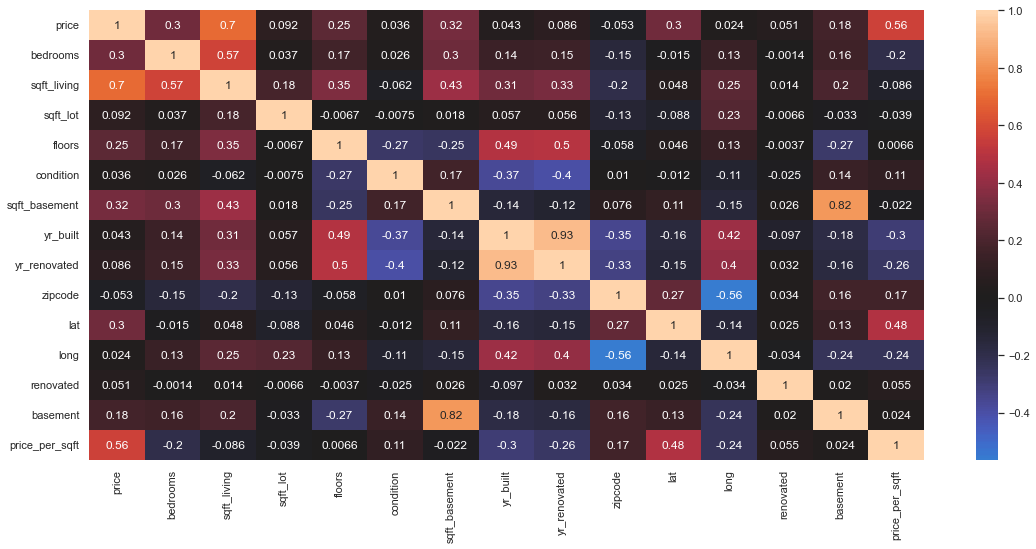

In [60]:
sns.set(rc={'figure.figsize':(18.7,8.27)})
sns.heatmap (df.drop(['sqft_above','grade','sqft_living15', 'sqft_lot15','bathrooms'], axis=1).corr(), annot=True, center=0)
